In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")
os.environ['LANGCHAIN_API_KEY']=os.getenv("LANGCHAIN_API_KEY")
os.environ['LANGCHAIN_TRACING_V2']='true'
os.environ['LANGCHAIN_PROJECT']="Image Generation App"

In [ ]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o") 
llm_with_image_generation = llm.bind_tools(
    [
        {"type": "image_generation", "quality": "medium", "size": "1024x1536" }
    ]
)


In [ ]:
response = llm_with_image_generation.invoke(
    "Generate a photorealistic image of a futuristic cat wearing a hat."
)


# Dalle Image generator

In [ ]:
from langchain_community.tools.openai_dalle_image_generation import (
    OpenAIDALLEImageGenerationTool,
)
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import ChatOpenAI
from langchain.agents import create_agent



In [ ]:

llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
api_wrapper = DallEAPIWrapper()
dalle_tool = OpenAIDALLEImageGenerationTool(api_wrapper=api_wrapper)


In [ ]:

tools = [dalle_tool]

agent = create_agent(llm, tools, debug=True)

# User prompt
prompt = "Create an image of a halloween night at a haunted museum"

messages = [
    # "role": "user" Indicates message is coming from user
    # "content": prompt is where the user's input is placed
    {"role": "user", "content": prompt}
]


In [ ]:

# Sending the message to be processed and adjusted by ChatGPT, after which is sent through DALL-E
response = agent.invoke({"messages": messages})

print(response)

# Dalle Image generator 2

In [39]:
import requests
from PIL import Image
from io import BytesIO
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from IPython.display import display as ipython_display
from IPython.display import Image as IPythonImage
from langchain_core.prompts import PromptTemplate
from langchain_openai import OpenAI
from langchain_classic.chains import LLMChain

In [48]:
# 1. Define the image generation tool
# The default model is "dall-e-3"
llm = OpenAI(temperature=0.9)
prompt = PromptTemplate(
    input_variables=["image_desc"],
    template="Generate a short prompt  to generate an image based on the following description: {image_desc}",
)
chain = LLMChain(llm=llm, prompt=prompt)
# image_generator_tool = DallEAPIWrapper(
#     n=1,            # Number of images to generate (default is 1)
#     model="dall-e-3",
#     size="1024x1024" # Image size
# )


In [49]:
# 2. Define the prompt

# 3. Generate the image URL using LangChain
prompt = "A majestic lion wearing a crown, in the style of a classical oil painting"
prompt2 = "halloween night at a haunted museum"
print(f"Generating image for prompt: '{prompt}'...")

Generating image for prompt: 'A majestic lion wearing a crown, in the style of a classical oil painting'...


In [50]:
# dir(image_generator_tool)

In [51]:
image_url = DallEAPIWrapper().run(chain.run(prompt))
image_url

'https://oaidalleapiprodscus.blob.core.windows.net/private/org-Pui4NOlkNBHdgO8H0JbCpbaR/user-3IbAuW2Ta716U78aWFKyb8zc/img-hWmzXiGCmA61FpKhPRlfkJac.png?st=2026-01-06T16%3A06%3A56Z&se=2026-01-06T18%3A06%3A56Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=1726b4ce-fee1-450b-8b92-1731ad8745f6&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2026-01-06T17%3A06%3A56Z&ske=2026-01-07T17%3A06%3A56Z&sks=b&skv=2024-08-04&sig=S5HEyRnZZw32gDCOZMf9r8qlWL/vCDVoImsHx0/n0Do%3D'

Image format: PNG, size: (1024, 1024), mode: RGB


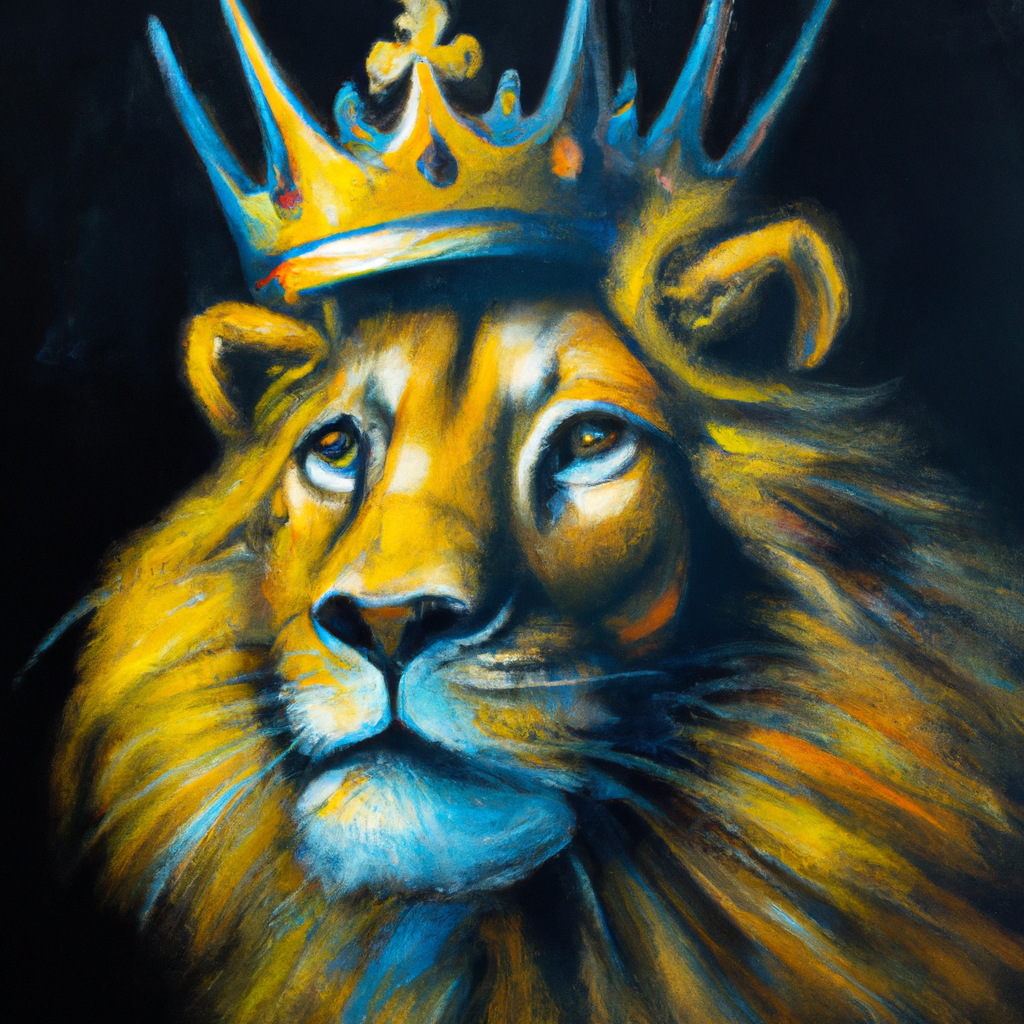

In [53]:
from PIL import Image
from io import BytesIO

# 2. Fetch the image from the web
response = requests.get(image_url)

# 3. Check if the request was successful
if response.status_code == 200:
    # 4. Open the image using Pillow from the byte stream
    img = Image.open(BytesIO(response.content))
    
    # 5. Display the image in the notebook
    print(f"Image format: {img.format}, size: {img.size}, mode: {img.mode}")
    display(img)
else:
    print(f"Failed to fetch image. Status code: {response.status_code}")